In [1]:
using LinearAlgebra
using Plots
using Distributions
using Random
using LaTeXStrings

## Ising Model
The Ising Model is a model for ferromagnetism. It is one of the simplest models that describes a phase transition for certain cases. The model consists of a $d$ dimensional lattice where each lattice point is characterised by a "spin" which can take values 1 or -1. Each such arrangement of spins in the lattice constitutes a state. 

The Ising Hamiltonian is of the form:

$$\mathscr{H} =-J \sum \limits _{\langle i,j \rangle} \sigma_i \sigma_j -B \sum \limits _{i} \sigma_i $$
where ${\langle i,j \rangle}$ denotes the sum over nearest neighbours in the lattice, J denotes the interaction strength between the nearest neighbours. $\sigma_i$ denotes the $i^\text{th}$ spin. Thus, $\sigma_i= \pm 1 \ \ \forall \ i$

Here we simulate a 2D Ising Model using Monte Carlo Method: 

- Metropolis Algorithm
- Glauber Dynamics

Both the methods follow that the process to equilibrium is a Markov process, for which the transition to the next state is dependent only on the present state. 

### Algorithm (Metropolis)
1. Start from an initial state $\mu$
2. Choose a spin randomly from the lattice, say $\sigma_i$
3. Calculate the energy difference between the present state and the state $\nu $ when $\sigma_i$ is flipped, that is, $\sigma_i \rightarrow -\sigma_i$. Suppose the energy difference is $\triangle E = E_\mu - E_nu$
4. If $\triangle E \leq 0 $ then the spin will be flipped. Else, the spin maybe flipped but according to some probability. Perform the following to decide whether or not to flip the spin

    - Choose a random number between 0 and 1
    - Calculate the acceptance ratio. $A \propto \exp(-\beta \triangle E)$
    - If $r \leq A$, then do the flip, else leave the state alone.
5. Accept this new state $\nu $ after Step 4. 

### Algorithm (Glauber Dynamics)

The algorithm is similar to Metropolis, however, the probability by which we flip the spin is different. So, instead of step 4 above, we perform the following: 
- If $\triangle E < 0 $ then the spin will be flipped. Else if $\triangle E > 0 $, the spin maybe flipped but according to some probability. Perform the following to decide whether or not to flip the spin
    - Choose a random number between 0 and 1
    - Calculate the acceptance ratio. $A \propto 1/(1+\exp(\beta \triangle E))$
    - If $r \leq A$, then do the flip, else leave the state alone. 
    
If $\triangle E = 0 $ then the spin is flipped with probability 0.5


In [2]:
#Metropolis Algorithm

#Function which returns the final state after performing the Metropolis algorithm
function mag(n,beta, p )
    m=[]
    L=zeros(n,n); #creating a matrix which will be our lattice

    #assigning spins to lattice site according to probability p 
    for i =2:n-1
        for j = 2:n-1
            a=rand()
            if a<p
                L[i,j]=1
            else
                L[i,j]=-1
            end
        end
    end

    #imposing periodic boundary condition to ensure that boundary terms also get 4 neighbours
    L[n,:]=L[2,:];
    L[:,1]=L[:,n-1];
    L[:,n-1]=L[:,1];
    L[1,:]=L[11,:];

    #running trials to reach the equilibrium state
    for i =1:1000000
        b=beta 
        t=rand(2:n-1,1,2) #choosing a random lattice point
        i=t[1]
        j=t[2]
        a=L[i,j]
        S= -2a*(L[i+1,j]+L[i-1,j]+L[i,j+1]+L[i,j-1]) #calculating energy difference between the present state and if spin is flipped
        E_diff=-S

        #using the spin flip rules
        if E_diff<=0
            L[i,j]=-L[i,j]
        else
            A=exp(-b*E_diff)
            cnt=rand()
            if cnt<A
                L[i,j]=-L[i,j]
            end
        end
        #append!(m, sum(L[2:n-1,2:n-1])/(n*n))
    end
    L[2:n-1,2:n-1]#returning the final state after performing algorithm
end

mag (generic function with 1 method)

In [3]:
#Glauber Dynamics

#Function which returns the final state after performing the Glauber dynamics algorithm
function mag_g(n,beta, p )
    m=[]
    L=zeros(n,n); #creating a matrix which will be our lattice

    #assigning spins to lattice site according to probability p 
    for i =2:n-1
        for j = 2:n-1
            a=rand()
            if a<p
                L[i,j]=1
            else
                L[i,j]=-1
            end
        end
    end

    #imposing periodic boundary condition to ensure that boundary terms also get 4 neighbours
    L[n,:]=L[2,:];
    L[:,1]=L[:,n-1];
    L[:,n-1]=L[:,1];
    L[1,:]=L[11,:];

    #running trials to reach the equilibrium state
    for i =1:1000000
        b=beta 
        t=rand(2:n-1,1,2) #choosing a random lattice point
        i=t[1]
        j=t[2]
        a=L[i,j]
        S= -2a*(L[i+1,j]+L[i-1,j]+L[i,j+1]+L[i,j-1]) #calculating energy difference between the present state and if spin is flipped
        E_diff=-S

        #using the spin flip rules
        if E_diff<0
            L[i,j]=-L[i,j]
        elseif E_diff==0
            A=0.5
            cnt=rand()
            if cnt<A
                L[i,j]=-L[i,j]
            end
        else
            A=1/(1+exp(b*E_diff))
            cnt=rand()
            if cnt<A
                L[i,j]=-L[i,j]
            end
        end
        #append!(m, sum(L[2:n-1,2:n-1])/(n*n))
    end
    L[2:n-1,2:n-1]
end

mag_g (generic function with 1 method)

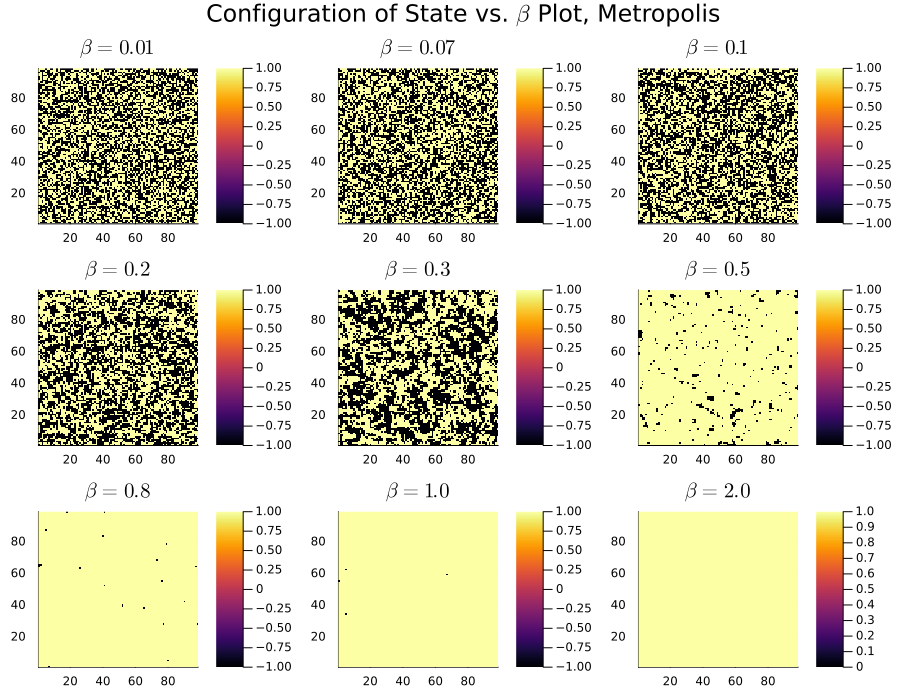

In [4]:
#For Glauber, plotting different states for different values of beta 

#list of beta values
para = [0.01,0.07,0.1,0.2,0.3,0.5,0.8,1,2];


plots = [heatmap(mag(100,i,0.7), title= L" \beta = %$i") for i in para]
plot(plots...; layout=(3,3), size=(900,700))
plot!(plot_title=L"Configuration of State vs. $\beta$ Plot, Metropolis")
#savefig("Ising 100 X 100 Metropolis.png")

We see that initially there was a random distribution of spins of both values ($\pm 1$). This was a lower $\beta$ (or equivalently, higher temperature). As we increased $\beta$ (or decreased temperature), we see that the configuration changes such that the number of negative spins decrease. At $\beta=2$, we get that almost all spins are up spins (+1). This is expected as 2D ising model is endowed with a phase transition from a disordered, non-magnetic state (where spins are randomly aligned in any direction, hence average magnetisation is 0) to an ordered, ferromagnetic state (where are spins aligned in the same direction). 

We now check the average magnetisation and how it varies with $\beta$. The average magnetisation is given by: $ m = \langle \sigma_i \rangle = \frac{\sum \limits_i \sigma_i}{N} $ where N is the total number of spins in the lattice. We consider two cases where the initial states provided by us had higher +1 and -1 spins respectively. So, we see that the states which had more +1 spins had a limiting magnetisation of +1 at higher temperature and vice versa. 

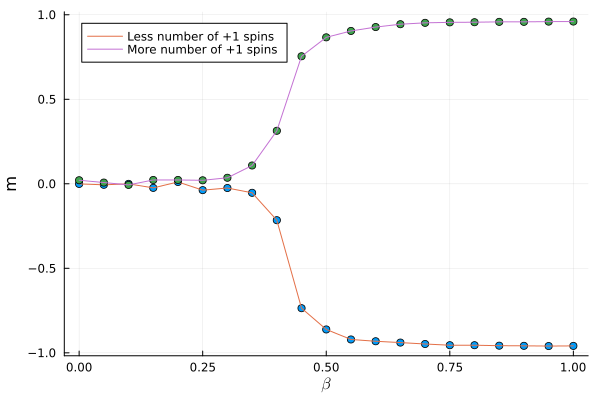

In [5]:
M=[sum(mag(100,i, 0.2))/10000 for i =0:0.05:1];
x=0:0.05:1
scatter(x,M, label="")
plot!(x,M, label = "Less number of +1 spins ")

M1=[sum(mag(100,i, 0.9))/10000 for i =0:0.05:1];
x1=0:0.05:1
scatter!(x1,M1, label="")
plot!(x1,M1, label = "More number of +1 spins ")
plot!(xlabel= L"\beta", ylabel="m")


We see that initially the magnetisation was 0 which is expected as $\beta$ was low, so temperature was high, hence due to thermal fluctuations, there was no magnetisation. As temperature decreased, we see that the magnetisation reached a limiting value of $\pm 1$. Hence a phase transition has occurred. 

We now do the same thing using Glauber dynamics algorithm.

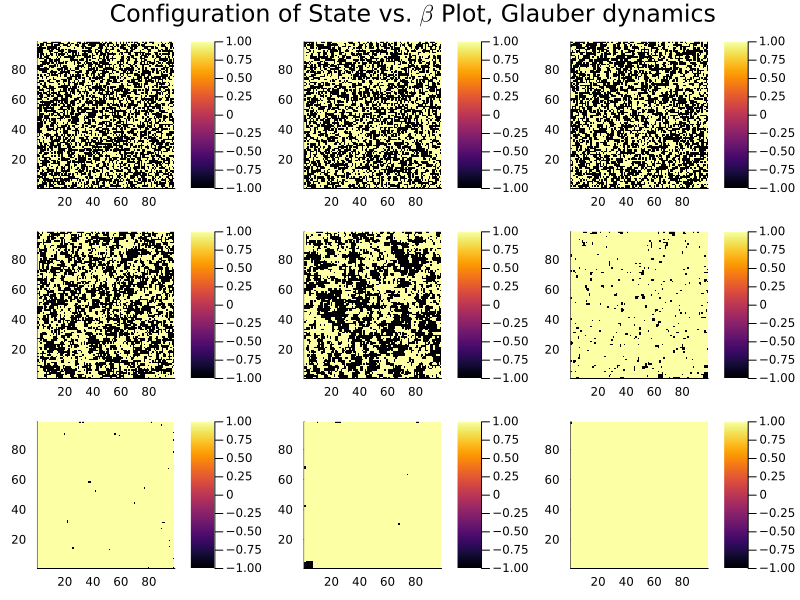

In [6]:
para = [0.01,0.07,0.1,0.2,0.3,0.5,0.8,1,2];
plots = [heatmap(mag_g(100,i,0.7)) for i in para]
plot(plots...; layout=(3,3), size=(800,600))
plot!(plot_title=L"Configuration of State vs. $\beta$ Plot, Glauber dynamics")
#savefig("Ising 100 X 100 Glauber.png")

We see that it gives the same result, although the glauber dynamics algorithm is faster than metropolis

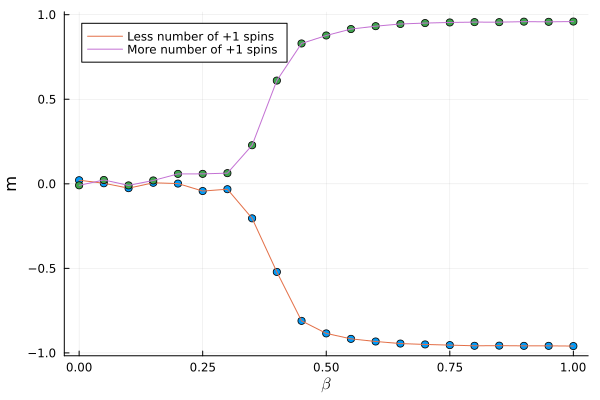

In [7]:
M=[sum(mag_g(100,i, 0.2))/10000 for i =0:0.05:1];
x=0:0.05:1
scatter(x,M, label="")
plot!(x,M, label = "Less number of +1 spins ")

M1=[sum(mag_g(100,i, 0.9))/10000 for i =0:0.05:1];
x1=0:0.05:1
scatter!(x1,M1, label="")
plot!(x1,M1, label = "More number of +1 spins ")
plot!(xlabel= L"\beta", ylabel="m")
